In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
import pandas as pd
from random import random
%matplotlib notebook

In [2]:
def plot_diff_matrix(w, N_CITIES, i, title):
    f1 = plt.figure(i)

    diff_mtx = (w[N_CITIES-1] - w[0])

    x = np.arange(0, N_CITIES, 1)
    y = np.arange(0, N_CITIES, 1)
    z = diff_mtx
    plt.title(title)
    plt.contourf(x,y,z)
    plt.colorbar()

In [3]:
def noise_data(w, N_CITIES):
    w_noised = w.copy()
    for i in range(N_CITIES):
        for j in range(i+1, N_CITIES):
            noise = np.random.normal(0, 8 + random(), N_CITIES)
            w_noised[:, i, j] = w_noised[:, j, i] = w[:, i, j] + noise
    return w_noised

In [4]:
def compute_5_numbers_changes(w, w_noised, N_CITIES):
    print("5_numbers_changes")
    changes = []
    changes_noised = []

    diff = []
    diff_noised = []
    for t in range(N_CITIES-1):
        diff.append(abs(w[t]-w[t-1]))
        diff_noised.append(abs(w_noised[t]-w_noised[t-1]))
    diff = np.array(diff)
    diff_noised = np.array(diff_noised)

    for i in range(N_CITIES):
        for j in range(i+1, N_CITIES):
            changes.append(diff[:, i, j])        
            changes_noised.append(diff_noised[:, i, j])   
    changes = np.array(changes)     
    changes_noised = np.array(changes_noised)
    
    # for each of the changes compute the average change.
    average_chg = np.average(changes, axis=1)
    pd_average_shg = pd.Series(average_chg)
    print("DIFF:")
    print(pd_average_shg.describe())

    average_chg_noised = np.average(changes_noised, axis=1)
    pd_average_shg_noised = pd.Series(average_chg_noised)
    print("\nDIFF_noised:")
    print(pd_average_shg_noised.describe())

In [5]:
def compute_5_numbers_costs(w, w_noised, N_CITIES):
    print("5_numbers_costs")
    costs = []
    costs_noised = []

    for i in range(N_CITIES):
        for j in range(i+1, N_CITIES):
            costs.append(w[0, i, j])
            costs_noised.append(w_noised[0, i, j])

    costs = np.array(costs)
    pd_cost = pd.Series(costs)

    costs_noised = np.array(costs_noised)
    pd_cost_noised = pd.Series(costs_noised)
    
    print("W:")
    print(pd_cost.describe())
    print("\nW_noised:")
    print(pd_cost_noised.describe())

In [ ]:
# IRIDIUM 33
loaded = np.load('../instances/ir33weights.npz')
w = loaded['w']
loaded.close()
N_CITIES = np.shape(w)[0]

In [6]:
# COSMOS
loaded = np.load('../instances/cosmosweights.npz')
cos = loaded['w']
loaded.close()
COS_N_CITIES = np.shape(cos)[0]
np.shape(cos)

(533, 533, 533)

In [7]:
cos_noised = noise_data(cos, COS_N_CITIES)

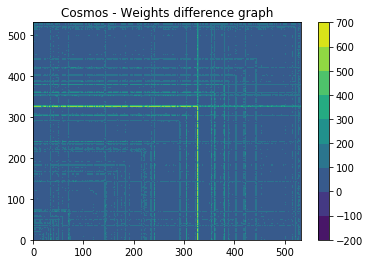

In [8]:
plot_diff_matrix(cos_noised, COS_N_CITIES, 1, "Cosmos - Weights difference graph")

In [9]:
plot_diff_matrix(cos_noised, COS_N_CITIES, 2)

TypeError: plot_diff_matrix() missing 1 required positional argument: 'title'

In [10]:
compute_5_numbers_changes(cos, cos_noised, COS_N_CITIES)

5_numbers_changes
DIFF:
count    141778.000000
mean          0.104406
std           0.157136
min           0.000015
25%           0.018140
50%           0.044961
75%           0.125690
max           2.121903
dtype: float64

DIFF_noised:
count    141778.000000
mean          9.632163
std           0.503567
min           7.821922
25%           9.277970
50%           9.624702
75%           9.975529
max          12.047872
dtype: float64


In [11]:
compute_5_numbers_costs(cos, cos_noised, COS_N_CITIES)

5_numbers_costs
W:
count    141778.000000
mean       9095.489258
std        4495.425781
min          42.124512
25%        5267.662476
50%        9924.316895
75%       13351.370361
max       15147.131836
dtype: float64

W_noised:
count    141778.000000
mean       9095.580078
std        4495.422852
min          38.293842
25%        5266.162231
50%        9923.942871
75%       13352.471680
max       15160.575195
dtype: float64


In [12]:
# FENGYUN
loaded = np.load('../instances/fengyun_1000.npz')
fen = loaded['w']
loaded.close()
FEN_N_CITIES = np.shape(fen)[0]
np.shape(fen)

(1000, 1000, 1000)

In [13]:
fen_noised = noise_data(fen, FEN_N_CITIES)

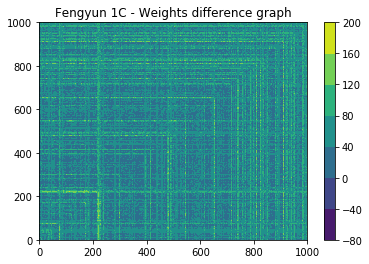

In [14]:
plot_diff_matrix(fen_noised, FEN_N_CITIES, 1, "Fengyun 1C - Weights difference graph")

In [15]:
compute_5_numbers_changes(fen, fen_noised, FEN_N_CITIES)

5_numbers_changes
DIFF:
count    499500.000000
mean         32.566586
std          19.586338
min           0.132717
25%          13.977884
50%          33.570112
75%          51.587344
max          67.126862
dtype: float64

DIFF_noised:
count    499500.000000
mean         42.095577
std          19.583082
min           8.792897
25%          23.515537
50%          43.089989
75%          61.106503
max          76.426033
dtype: float64


In [16]:
compute_5_numbers_costs(fen, fen_noised, FEN_N_CITIES)

5_numbers_costs
W:
count    499500.000000
mean       8117.387207
std        4883.794434
min          32.973465
25%        3481.259460
50%        8367.713867
75%       12859.049805
max       16739.990234
dtype: float64

W_noised:
count    499500.000000
mean       8117.366211
std        4883.831055
min          25.234816
25%        3482.056824
50%        8367.705566
75%       12859.283203
max       16737.962891
dtype: float64
